# Install detectron2

In [ ]:
# Dependencies 

'''
!pip install pyyaml==5.1 --user
!pip install torchvision==0.10.0 --user

# Install Detectron

# Windows
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# LINUX
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.9/index.html

# After installation, you need to "restart runtime"
exit(0)
'''

In [1]:
# check pytorch installation: 
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("1.9")   # please manually install torch 1.9 if Colab changes its default version

1.9.0+cpu False


In [2]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import cv2
import numpy as np
from detectron2.engine import DefaultPredictor

from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [6]:
import matplotlib.pyplot as plt
def display_image(image, figsize=(15,20)):
    try:
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    except: 
        pass
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.imshow(image)

# Run a pre-trained detectron2 model

We first download an image from the COCO dataset:

we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [7]:
from table_extractor.detectron_config import cfg
predictor = DefaultPredictor(cfg)

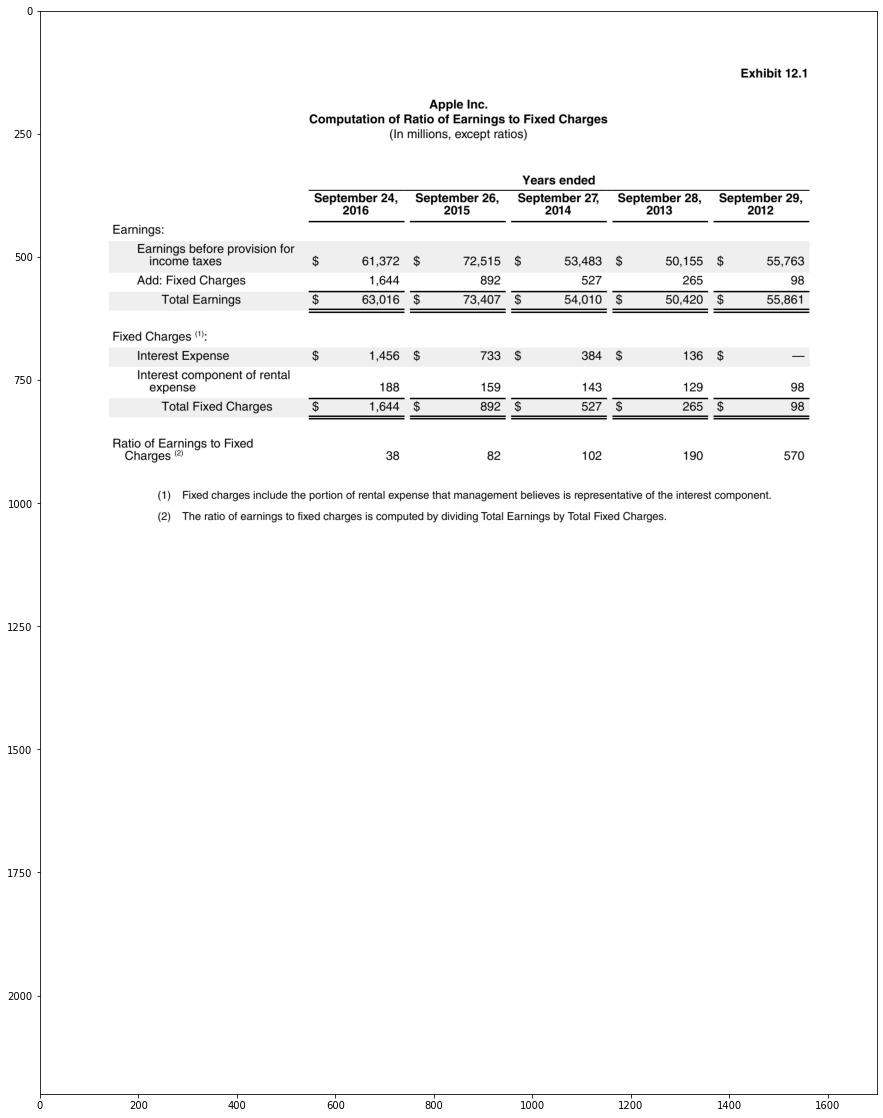

In [15]:
image = cv2.imread("Table Detection/data/Report_pics_apple/out_98.png")

display_image(image)

### Descriptive

In [ ]:
def myfunc():
    return {}
try:
    DatasetCatalog.register("Table", myfunc)
except:
    pass
MetadataCatalog.get("Table").set(thing_classes=["Table"])

metadata = MetadataCatalog.get('Table')

In [129]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
image = cv2.imread("Table Detection/data/Report_pics_apple/out_29.png")
outputs = predictor(image)
print(outputs["instances"].pred_classes)
print(outputs["instances"].scores)
print(outputs["instances"].pred_boxes)

tensor([0, 0, 0, 0])
tensor([0.9987, 0.9966, 0.9965, 0.9942])
Boxes(tensor([[ 146.8954, 1563.3177, 1604.3040, 1759.7521],
        [ 126.1535,  619.3790, 1575.3495,  736.1946],
        [ 144.7727,  199.0260, 1544.5710,  322.7751],
        [ 137.5404, 1066.6764, 1572.2509, 1185.5511]]))


In [156]:
a = np.zeros((1,1))
a.any()

False

In [90]:
# We can use `Visualizer` to draw the predictions on the image.
# v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = Visualizer(image[:, :, ::-1], metadata=metadata, scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
# cv2_imshow(out.get_image()[:, :, ::-1])

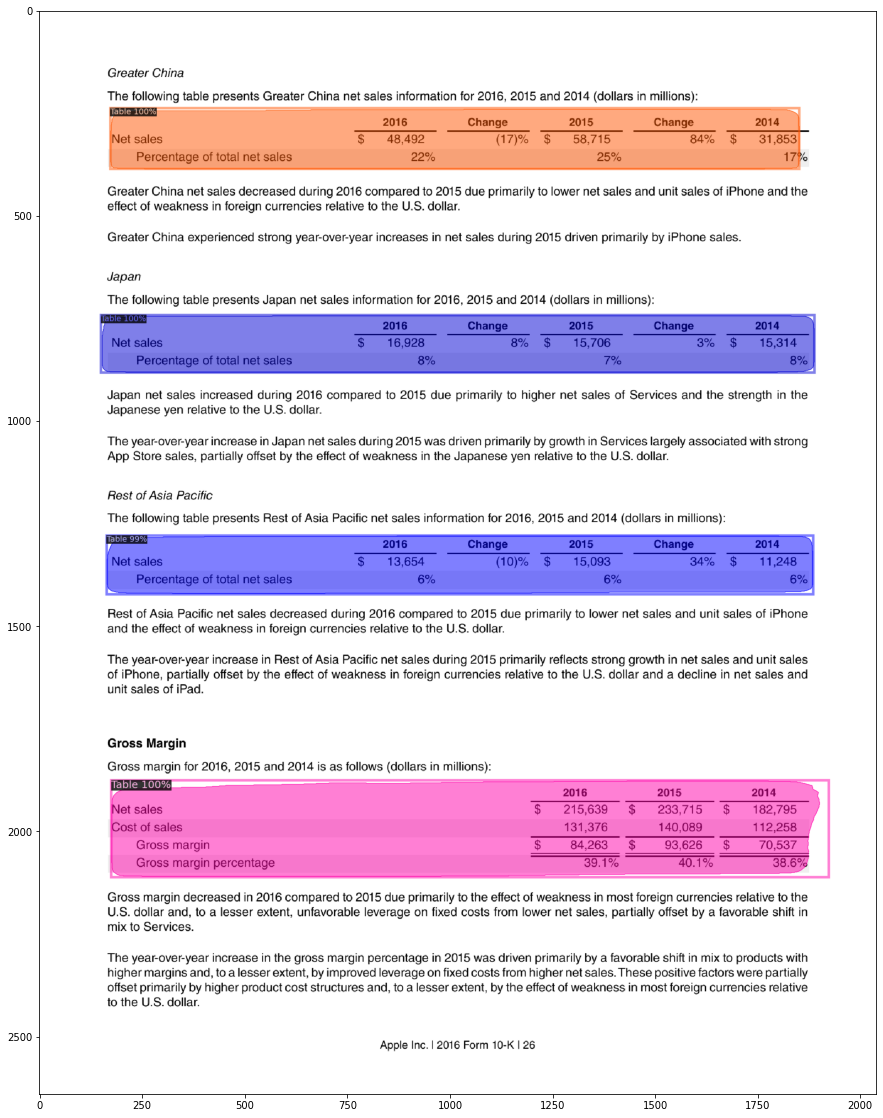

In [91]:
display_image(out.get_image()[:, :, ::-1], (15, 20))

In [147]:
boxes = outputs['instances'].pred_boxes.tensor.numpy().astype(int)
boxes = np.array(sorted(boxes, key= lambda x: x[1]))
boxes

array([[ 144,  199, 1544,  322],
       [ 126,  619, 1575,  736],
       [ 137, 1066, 1572, 1185],
       [ 146, 1563, 1604, 1759]])

In [148]:
tables = []
if boxes.any():
    for (x1, y1, x2, y2) in boxes:
        tables.append(image[y1:y2, x1:x2])

if tables:
    print(True)
else:
    print(False)

True


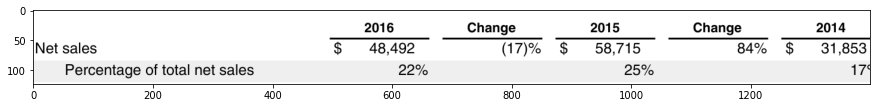

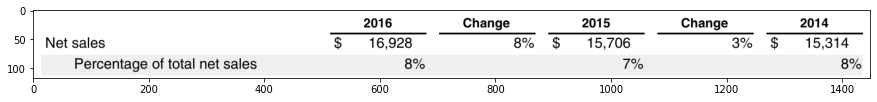

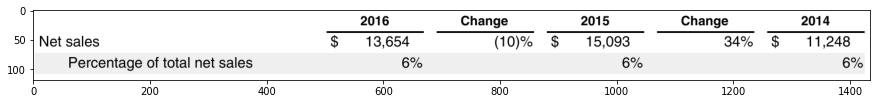

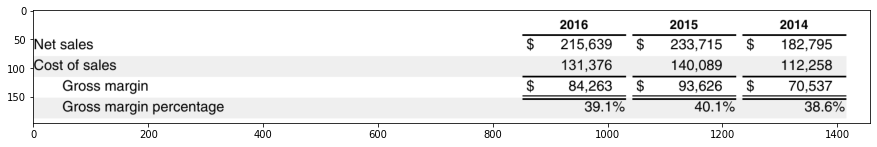

In [149]:
for i in tables:
    display_image(i)